<a href="https://colab.research.google.com/github/ygm0516/data_analysis/blob/main/data_analysis_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

첨부자료는 서울 열린 데이터광장에서 제공하는 2021년 서울 자치구별 5대 범죄발생 현황 자료로써 교과목 진도에 맞게 재구성한 화일입니다.

*공공데이터 URL: https://data.seoul.go.kr/dataList/316/S/2/datasetView.do

#2021년 서울시 자치구별 5대 범죄 발생 현황 자료를 활용하여 다음 질문에 답하기 위한 데이터 분석 과정을 기술하세요.

#####1) 폭력 발생건수 많은 상위 10개 자치구의 강간, 절도, 폭력 발생건수를 **선차트**로 나타내시오.
#####2) 살인이 가장 많이 발생한 상위 5개 지자체의 살인 발생 건수와 살인 검거 건수를 **막대차트**로 나타내시오.
#####3) 범죄 발생 건수의 전체 합이 가장 적은 5개 지자체의 발생 비율을 **파이차트**로 나타내시오.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#matplotlib 에 한글 폰트를 지원하기 위한 설치 코드

!pip install koreanize-matplotlib
import koreanize_matplotlib


#1.데이터 수집(읽어오기) 및 정보 확인하기

In [ ]:
# 데이터를 관리 및 정제하고 차트를 생성하기 위한 라이브러리 선언하기

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 2021년 서울시 5대 범죄발생현황.csv 화일 읽어오기


Crime_Seoul = pd.read_csv('/content/drive/MyDrive/대학교파일/4학년1학기/데이터분석/14주차 데이터 분석/2021년 서울시 5대 범죄발생현황.csv',encoding='cp949',header=[3],skiprows=[4])
Crime_Seoul


,자치구별,살인_발생,살인_검거,강도_발생,강도_검거,강간_발생,강간_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
0,종로구,6,3,4,4,156,757,1079,743,1467,1248
1,중구,6,6,6,6,161,97,1279,739,1409,1224
2,용산구,3,2,1,1,141,103,945,484,1291,1069
3,성동구,3,4,4,1,110,82,905,497,1090,926
4,광진구,5,3,4,4,208,161,1414,754,1456,1280
5,동대문구,3,4,7,8,169,147,1240,659,1540,1295
6,중랑구,4,4,6,7,141,117,1399,835,1660,1442
7,성북구,4,3,2,2,118,88,895,474,1392,1220
8,강북구,4,4,1,1,136,115,777,537,1383,1255
9,도봉구,2,2,2,1,72,64,772,376,1012,851


In [ ]:
#상위 5개 데이터 확인하기
Crime_Seoul.head(5)

,자치구별,살인_발생,살인_검거,강도_발생,강도_검거,강간_발생,강간_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
0,종로구,6,3,4,4,156,757,1079,743,1467,1248
1,중구,6,6,6,6,161,97,1279,739,1409,1224
2,용산구,3,2,1,1,141,103,945,484,1291,1069
3,성동구,3,4,4,1,110,82,905,497,1090,926
4,광진구,5,3,4,4,208,161,1414,754,1456,1280


In [ ]:
#전반적인 행열 정보 확인하기
Crime_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구별    25 non-null     object
 1   살인_발생   25 non-null     int64 
 2   살인_검거   25 non-null     int64 
 3   강도_발생   25 non-null     int64 
 4   강도_검거   25 non-null     int64 
 5   강간_발생   25 non-null     int64 
 6   강간_검거   25 non-null     int64 
 7   절도_발생   25 non-null     int64 
 8   절도_검거   25 non-null     int64 
 9   폭력_발생   25 non-null     int64 
 10  폭력_검거   25 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.3+ KB


In [ ]:
#수치적 통계분포 확인하기
Crime_Seoul.describe()

,살인_발생,살인_검거,강도_발생,강도_검거,강간_발생,강간_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
count,25.0000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,4.9600,4.480000,4.88000,4.640000,196.440000,177.840000,1341.240000,718.000000,1670.280000,1415.520000
std,2.6533,2.347339,4.82459,4.599638,105.411922,147.522224,389.670938,184.510388,480.918437,416.987822
min,1.0000,1.000000,1.00000,1.000000,72.000000,64.000000,772.000000,376.000000,1012.000000,851.000000
25%,3.0000,3.000000,2.00000,2.000000,136.000000,103.000000,1027.000000,562.000000,1383.000000,1220.000000
50%,4.0000,4.000000,4.00000,4.000000,161.000000,120.000000,1361.000000,730.000000,1546.000000,1295.000000
75%,6.0000,6.000000,6.00000,6.000000,246.000000,196.000000,1510.000000,831.000000,1899.000000,1513.000000
max,12.0000,11.000000,25.00000,23.000000,578.000000,757.000000,2372.000000,1160.000000,3159.000000,2749.000000


#2.각 지문에 대하여 시각적으로 데이터 분석하기

###1)폭력 발생건수 많은 상위 10개 자치구의 강간, 절도, 폭력 발생건수를 **선 차트**로 나타내시오.

In [ ]:
#데이터 시각화를 위해 데이터 재설정하기
폭력발생순=Crime_Seoul.sort_values(by='폭력_발생', ascending=False).head(10)

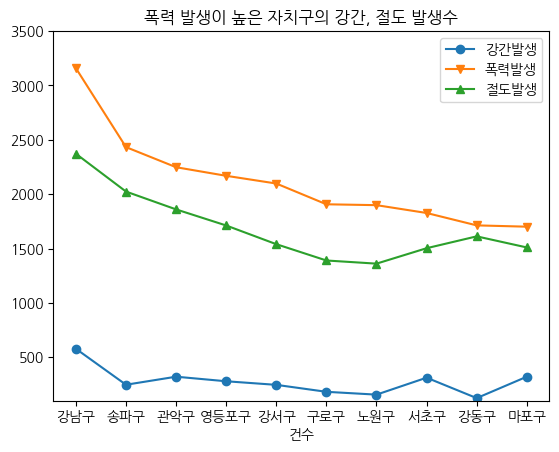

In [ ]:
#선 차트 생성하고 꾸미기
plt.rc('font', family='NanumGothic')
plt.plot(폭력발생순['자치구별'],폭력발생순['강간_발생'],label='강간발생',marker='o')
plt.plot(폭력발생순['자치구별'],폭력발생순['폭력_발생'],label='폭력발생',marker='v')
plt.plot(폭력발생순['자치구별'],폭력발생순['절도_발생'],label='절도발생',marker='^')

plt.legend()
plt.ylim(100,3500)
plt.title('폭력 발생이 높은 자치구의 강간, 절도 발생수')
plt.xlabel('자치구')
plt.xlabel('건수')
plt.show()


###2)살인이 가장 많이 발생한 상위 5개 지자체의 살인 발생 건수와 살인 검거 건수를 **막대차트**로 나타내시오.

In [ ]:
#데이터 시각화를 위해 데이터 재설정하기


살인발생순=Crime_Seoul.sort_values(by='살인_발생', ascending=False).head(5)
살인발생순

,자치구별,살인_발생,살인_검거,강도_발생,강도_검거,강간_발생,강간_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
22,강남구,12,11,25,23,578,454,2372,1160,3159,2749
15,강서구,9,7,3,3,246,188,1540,921,2098,1925
21,서초구,9,9,5,5,312,228,1503,691,1827,1506
20,관악구,8,4,7,6,321,269,1860,929,2248,1926
18,영등포구,8,8,11,11,279,196,1712,831,2169,1731


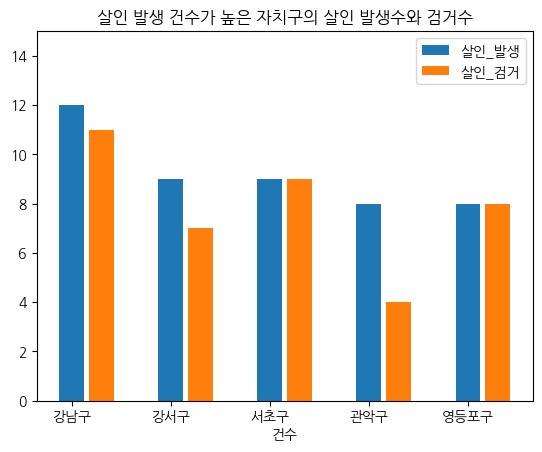

In [ ]:
#막대 차트 생성하고 꾸미기
import numpy as np
plt.rc('font', family='NanumGothic')
pos=np.arange(len(살인발생순))
plt.xticks(pos,살인발생순['자치구별'])
plt.bar(pos,살인발생순['살인_발생'],label='살인_발생',width=0.25)
plt.bar(pos+0.3,살인발생순['살인_검거'],label='살인_검거',width=0.25)

plt.legend()
plt.ylim(0,15)
plt.title('살인 발생 건수가 높은 자치구의 살인 발생수와 검거수')
plt.xlabel('자치구')
plt.xlabel('건수')
plt.show()



###3)범죄 발생 건수의 전체 합이 가장 적은 5개 지자체의 발생 비율을 **파이차트**로 나타내시오.

In [ ]:
#데이터 시각화를 위해 데이터 재설정하기

#살인 발생 + 강도발생 + 강간 발생+ 절도 발생+폭력발생의 합계를 컬럼 생성
#합계를 기준으로 정렬

Crime_Seoul['합계']=Crime_Seoul['살인_발생']+Crime_Seoul['강간_발생']+Crime_Seoul['폭력_발생']+Crime_Seoul['절도_발생']
합계=Crime_Seoul.sort_values(by='합계', ascending=True).head(5)
합계

,자치구별,살인_발생,살인_검거,강도_발생,강도_검거,강간_발생,강간_검거,절도_발생,절도_검거,폭력_발생,폭력_검거,합계
9,도봉구,2,2,2,1,72,64,772,376,1012,851,1858
3,성동구,3,4,4,1,110,82,905,497,1090,926,2108
12,서대문구,3,3,2,2,137,120,1027,562,1109,907,2276
8,강북구,4,4,1,1,136,115,777,537,1383,1255,2300
2,용산구,3,2,1,1,141,103,945,484,1291,1069,2380


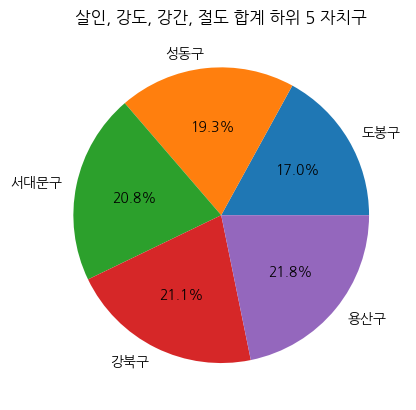

In [ ]:
#파이 차트 생성하고 꾸미기
plt.title('살인, 강도, 강간, 절도 합계 하위 5 자치구')
plt.pie(합계['합계'] ,labels=합계['자치구별'],autopct = '%.1f%%')
plt.show()